<h1 align=center><font size = 5>Introduction: Clustreing Dhaka Neighborhoods for a Restaurant Business</font></h1>


### Background

Bangladeshis are known to be great food enthusiasts for decades. Going out to dine with families and friends has become a part of people’s daily life. People are inclining to try out foods from different countries day by day. Food delivery services evolved dramatically over the last couple of years. The food review YouTube channels are viewed the most in Bangladesh. 

Moreover, busy consumers don't have the opportunity or tendency to cook. They want the flavor of fresh food without the hassle of cooking. They want spicy, tasty, nutritious meals without dishes to wash. An increasing number of students, working parents, and elderly individuals prefer prominent convenience when it comes to purchasing their meals. The need for food-service businesses is increasing gradually with the improvement in the socio-economic condition of the country. Thus, it would be advantageous if we can predict the criteria that would help us to make a profit from a food-service business based in Bangladesh.

5 kinds of food-service businesses are most prevalent in Bangladesh based on the amount of investment.
 
1. Quick Service Restaurants QSR
2. Casual Dine Restaurants
3. Food Trucks
4. Cloud Kitchens
5. Raw food business

### Business Problem 
 
The basis of this study is to help a small group of investors who want to open their first restaurant in the Dhaka division in Bangladesh. Although Bangladesh is a relatively small yet densely populated country, her socio-economic standard is only improving every year. Lifestyle is changing fast in major cities like Dhaka. People are more prone to buy ready-foods instead of spending time to prepare them at home. The business is already competitive; hence a strategic plan is required. We can phrase the business problem like this- **“Where to Open Our First Restaurant in Dhaka, Bangladesh?”**


### Interested Audience
 
What type of clients or a group of people would be interested in this project?

• Business personnel or a group of investors who wants to invest or open a restaurant. This analysis will be a comprehensive guide to start or expand restaurants targeting a large pool of students, busy workers, and working parents in Bangladesh.

• Freelancer who would love to have their restaurant or cloud kitchen as a side business. This analysis will give an idea of where the business will encounter less competition.

• Data Science Enthusiasts, who want to implement some of the most used Exploratory Data Analysis techniques to obtain necessary data, analyze it, and, finally be able to tell a story out of it.



## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
<a id="#A">Part A: Where to open a restaurant in Bangladesh?</a>

1. <a href="#item1">Download and Explore Dataset</a>

2. <a href="#item2">Explore Districts of Bangladesh</a>

3. <a href="#item3">Analyze Each District</a>

4. <a href="#item4">Cluster Districts</a>

5. <a href="#item5">Examine Clusters</a> 
    
<a href="#B">Part B: Can we open the restaurant in the Division Dhaka?</a>
    
6. <a href="#item6">Cluster the Popular Division</a>
   
<a href="#C">Part C: What kind of restaurant will face less competition and where to set it up?</a>
    
7. <a href="#item7">Analyze Dhaka to Open a Restaurant</a>
    
8. <a href="#item8">Concluding Remarks</a>
    
</font>
</div>

Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [3]:
#!pip install requests
#!pip install html5lib
#!pip install bs4
#!pip show pandas

import warnings
warnings.filterwarnings('ignore')

# library to handle data in a vectorized manner
import numpy as np 

# library for data analsysis
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 

# uncomment this line if you haven't completed the Foursquare API lab
#!conda install -c conda-forge geopy --yes  

# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 

# library to handle requests
import requests 

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab

# map rendering library
import folium 

from urllib.request import urlopen
from bs4 import BeautifulSoup

print('Libraries imported.')

Libraries imported.


# A. Where to open a *restaurant* **in Bangladesh**?

## 1. Download and Explore Dataset

Bangladesh has a total of 8 divisions and 64 districts. In order to segment the districts and explore them, we will essentially need a dataset that contains the 8 divisions and the 64 districts that exist in each division as well as the the latitude and longitude coordinates of each district. 

Luckily, this dataset exists for free on the web. Here is the link to the dataset: https://en.wikipedia.org/wiki/List_of_districts_of_Bangladesh


### Webscraping Wikipedia data using BeautifulSoup

In [13]:
# url that we are scraping
url = 'https://en.wikipedia.org/wiki/List_of_districts_of_Bangladesh'

# this is the html from the given url
html = urlopen(url)

soup = BeautifulSoup(html)

# skip the first 1 header rows
data_rows = soup.findAll('tr')[1:]  

bangladesh_data = [[td.getText() for td in data_rows[i].findAll('td')]
            for i in range(len(data_rows))]

bangladesh_data[12]

['Barguna District', 'বরগুনা', 'Barisal', '1984', '892', '1939\n']

In [14]:
# create an empty list to hold all the data
bangladesh_data_02 = []  

# for each table row
for i in range(len(data_rows)):
    # create an empty list for each row
    bangladesh_row = []  

    # for each table data element from each table row
    for td in data_rows[i].findAll('td'):        
        # get the text content and append to the player_row 
        bangladesh_row.append(td.getText())        

    # then append each pick/player to the player_data matrix
    bangladesh_data_02.append(bangladesh_row)

In [15]:
bangladesh_data == bangladesh_data_02

True

#### Load the data into Pandas dataframe 

In [16]:
df_Bangladesh = pd.DataFrame(bangladesh_data)
df_Bangladesh.reset_index(inplace = True)
del df_Bangladesh['index']

df_Bangladesh.columns = ['District', 'Bengali Names', 'Division', 'Year Established','Population', 'Area', 'N']
df_Bangladesh.drop (['Bengali Names', 'Year Established', 'Area', 'N'], axis= 1, inplace = True) 

df_Bangladesh = df_Bangladesh[['Division', 'District', 'Population']]
#df_Bangladesh.loc[11, 'District'] = "Cox's Bazar"
df_Bangladesh.dropna(axis = 1)
df_Bangladesh = df_Bangladesh.iloc[12:]
df_Bangladesh = df_Bangladesh.iloc[:-35]
df_Bangladesh = df_Bangladesh.reset_index(drop = True)
df_Bangladesh.head()

,Division,District,Population
0,Barisal,Barguna District,892
1,Barisal,Barisal District,2415
2,Barisal,Bhola District,1946
3,Barisal,Jhalokati District,710
4,Barisal,Patuakhali District,1596


In [17]:
df_Bangladesh["Population"] = pd.to_numeric(df_Bangladesh["Population"])

# the population given as a multiple of 1000
df_Bangladesh ['Population'] = df_Bangladesh ['Population'] * 1000
df_Bangladesh.tail(10)

,Division,District,Population
54,Rangpur,Kurigram District,2050000
55,Rangpur,Lalmonirhat District,1249000
56,Rangpur,Nilphamari District,1820000
57,Rangpur,Panchagarh District,981000
58,Rangpur,Rangpur District,2866000
59,Rangpur,Thakurgaon District,1380000
60,Sylhet,Habiganj District,2059000
61,Sylhet,Moulvibazar District,1902000
62,Sylhet,Sunamganj District,2443000
63,Sylhet,Sylhet District,5316000


In [18]:
df_Bangladesh.shape

(64, 3)

#### Use geopy library to get the latitude and longitude values of districts of Bangladesh

There are similarities in names of the districts of Bangladesh with some other parts of the world. So we have to make a few changes in the names of the Districts manually to import the correct Coordinates using Geopy.

In [19]:
df_Bangladesh.loc[25, 'District'] = "Narayanganj BD"
df_Bangladesh.loc[40, 'District'] = "Jamalpur BD"
df_Bangladesh.loc[43, 'District'] = "Sherpur BD"

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>Bangladesh</em>, as shown below.

In [20]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="Bangladesh")
df_Bangladesh['Latitude'] = df_Bangladesh['District'].apply(geolocator.geocode).apply(lambda x: (x.latitude))

In [21]:
df_Bangladesh['Longitude'] = df_Bangladesh['District'].apply(geolocator.geocode).apply(lambda x: (x.longitude))

In [22]:
df_Bangladesh[['District','Dis']] = df_Bangladesh.District.str.split(" ", n = 1, expand=True)
del df_Bangladesh['Dis']
df_Bangladesh.loc[11, 'District'] = "Cox's Bazar"
df_Bangladesh.head(20)

,Division,District,Population,Latitude,Longitude
0,Barisal,Barguna,892000,22.157833,90.129495
1,Barisal,Barisal,2415000,22.756285,90.410984
2,Barisal,Bhola,1946000,22.336542,90.843902
3,Barisal,Jhalokati,710000,22.641564,90.200462
4,Barisal,Patuakhali,1596000,22.358966,90.331054
5,Barisal,Pirojpur,1277000,22.509560,90.007260
6,Chittagong,Bandarban,405000,21.787476,92.407325
7,Chittagong,Brahmanbaria,2954000,23.960600,91.119089
8,Chittagong,Chandpur,2514000,23.257854,90.806589
9,Chittagong,Chittagong,7913000,22.500518,91.481547


In [23]:
df_Bangladesh.dtypes

Division       object
District       object
Population      int64
Latitude      float64
Longitude     float64
dtype: object

AWESOME! Looks good so far!

<a id='item1'></a>

#### Let's make sure that the Bangladesh dataset has all 8 divisions and 64 districts.

In [24]:
print('The dataframe has {} divisions and {} districts.'.format(len(df_Bangladesh['Division'].unique()),
                                                                df_Bangladesh.shape[0]))

The dataframe has 8 divisions and 64 districts.


#### Define Foursquare Credentials and Version

In [25]:
CLIENT_ID = '0OIOAMV3MQX4QYSSVYLHCR0MEFPKQTZQ4SS0MH2VZNGJMPWG' # your Foursquare ID
CLIENT_SECRET = 'AQVTXDL3BAYH3ZFXZ1GOYD5CSKIP24J5NRPRC31UUK4Z0TEO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0OIOAMV3MQX4QYSSVYLHCR0MEFPKQTZQ4SS0MH2VZNGJMPWG
CLIENT_SECRET:AQVTXDL3BAYH3ZFXZ1GOYD5CSKIP24J5NRPRC31UUK4Z0TEO


<a id='item2'></a>

## 2. Explore Districts of Bangladesh

#### Let's create a function to repeat the same process to all the districts in Bangladesh

In [26]:
LIMIT = 100

def getNearbyVenues(div, names, latitudes, longitudes, radius=8000):
    
    venues_list=[]
    for div, name, lat, lng in zip(div, names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            div, 
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Division',
                  'District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each district and create a new dataframe called *bangladesh_venues*.

In [27]:
# type your answer here

bangladesh_venues = getNearbyVenues(div= df_Bangladesh['Division'], 
                                   names= df_Bangladesh['District'],
                                   latitudes= df_Bangladesh['Latitude'],
                                   longitudes= df_Bangladesh['Longitude']
                                  )



Barguna
Barisal
Bhola
Jhalokati
Patuakhali
Pirojpur
Bandarban
Brahmanbaria
Chandpur
Chittagong
Comilla
Cox's Bazar
Feni
Khagrachhari
Lakshmipur
Noakhali
Rangamati
Dhaka
Faridpur
Gazipur
Gopalganj
Kishoreganj
Madaripur
Manikganj
Munshiganj
Narayanganj
Narsingdi
Rajbari
Shariatpur
Tangail
Bagerhat
Chuadanga
Jessore
Jhenaidah
Khulna
Kushtia
Magura
Meherpur
Narail
Satkhira
Jamalpur
Mymensingh
Netrokona
Sherpur
Bogra
Joypurhat
Naogaon
Natore
Chapainawabganj
Pabna
Rajshahi
Sirajganj
Dinajpur
Gaibandha
Kurigram
Lalmonirhat
Nilphamari
Panchagarh
Rangpur
Thakurgaon
Habiganj
Moulvibazar
Sunamganj
Sylhet


#### Let's check the size of the resulting dataframe

In [28]:
print(bangladesh_venues.shape)
bangladesh_venues.head()

(234, 8)


,Division,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barisal,Barisal,22.756285,90.410984,Public Square,22.703231,90.370792,Park
1,Barisal,Barisal,22.756285,90.410984,Chawck Bazar,22.703693,90.373362,Flea Market
2,Barisal,Barisal,22.756285,90.410984,Bibir Pukur,22.703126,90.370420,Lake
3,Barisal,Barisal,22.756285,90.410984,Nathullahbadh Bus Terminal,22.714464,90.348975,Bus Station
4,Barisal,Barisal,22.756285,90.410984,Kirtankhola River,22.693634,90.373316,River


In [30]:
print('The dataframe has {} divisions and {} districts.'.format(len(df_Bangladesh['Division'].unique()),
                                                                df_Bangladesh.shape[0]))

The dataframe has 8 divisions and 64 districts.


In [31]:
address = 'Bangladesh'

geolocator = Nominatim(user_agent="Bangladesh_explorer")
location = geolocator.geocode(address)
latitude_bd = location.latitude
longitude_bd = location.longitude
print('The geograpical coordinate of Bangladesh are {}, {}.'.format(latitude_bd, longitude_bd))

The geograpical coordinate of Bangladesh are 24.4768783, 90.2932426.


#### Create a map of Bangldesh with 64 districts superimposed on top

In [32]:
# create map of New York using latitude and longitude values
map_Bangladesh = folium.Map(location=[latitude_bd, longitude_bd], zoom_start=6)

# add markers to map
for lat, lng, div, dis in zip(df_Bangladesh['Latitude'], df_Bangladesh['Longitude'], df_Bangladesh['Division'], df_Bangladesh['District']):
    label = '{}, {}'.format(dis, div)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Bangladesh)  
    
map_Bangladesh

#### Let's check how many venues were returned for each District

In [33]:
bangladesh_venues.groupby('Division').count()

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Division,,,,,,,
Barisal,15,15,15,15,15,15,15
Chittagong,30,30,30,30,30,30,30
Dhaka,129,129,129,129,129,129,129
Khulna,12,12,12,12,12,12,12
Mymensingh,12,12,12,12,12,12,12
Rajshahi,17,17,17,17,17,17,17
Rangpur,8,8,8,8,8,8,8
Sylhet,11,11,11,11,11,11,11


#### Let's find out how many unique categories can be curated from all the returned venues

In [220]:
print('There are {} uniques categories.'.format(len(bangladesh_venues['Venue Category'].unique())))

There are 102 uniques categories.


<a id='item3'></a>

# Part B: Can we open the restaurant in Division Dhaka suggested by cluster 3?

## 6. Cluster the Popular Division

Dhaka is the Capital of Bangladesh. There is a high possibility that setting up a restaurant would be really profitable somewhere in Dhaka. Let's dive into the available datsets! 

In [239]:
address = 'Dhaka'

geolocator = Nominatim(user_agent="Dhaka")
location = geolocator.geocode(address)
latitude_dhk = location.latitude
longitude_dhk = location.longitude
print('The geograpical coordinate of Dhaka are {}, {}.'.format(latitude_dhk, longitude_dhk))

The geograpical coordinate of Dhaka are 23.810651, 90.4126466.


In [240]:
dhk_data = bangladesh_venues[bangladesh_venues['Division'] == 'Dhaka'].reset_index(drop = True)
print (dhk_data.shape)
dhk_data.head()

(155, 8)


,Division,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Dhaka,Dhaka,23.810651,90.412647,Tabaq,23.812956,90.423879,Coffee Shop
1,Dhaka,Dhaka,23.810651,90.412647,Burger Lab,23.812615,90.424544,Burger Joint
2,Dhaka,Dhaka,23.810651,90.412647,Lobby of Radisson,23.816966,90.407251,Hotel Bar
3,Dhaka,Dhaka,23.810651,90.412647,Soi 71,23.804539,90.413471,Thai Restaurant
4,Dhaka,Dhaka,23.810651,90.412647,Movenpick,23.792333,90.415373,Ice Cream Shop


#### Let's find out how many unique categories can be curated from all the returned venues

In [241]:
print('There are {} uniques categories.'.format(len(dhk_data['Venue Category'].unique())))

There are 66 uniques categories.


In [257]:
# one hot encoding
dhk_onehot = pd.get_dummies(dhk_data[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
dhk_onehot['District'] = dhk_data['District'] 

# move neighborhood column to the first column
fixed_columns = [dhk_onehot.columns[-1]] + list(dhk_onehot.columns[:-1])
dhk_onehot = dhk_onehot[fixed_columns]

print (dhk_onehot.shape)
dhk_onehot.head(3)

(155, 67)


,District,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bar,Bike Shop,Bistro,Boat or Ferry,Burger Joint,Bus Station,Bus Stop,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Cricket Ground,Deli / Bodega,Department Store,Diner,Electronics Store,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Fried Chicken Joint,Gym / Fitness Center,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Lake,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Movie Theater,Multiplex,Nightclub,Office,Other Great Outdoors,Palace,Park,Pizza Place,Platform,Plaza,Portuguese Restaurant,Resort,Restaurant,River,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shopping Mall,Soccer Field,Supermarket,Sushi Restaurant,Thai Restaurant,Theme Park,Train Station,Turkish Restaurant,Zoo
0,Dhaka,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Dhaka,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Dhaka,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Next, let's group rows by district and by taking the mean of the frequency of occurrence of each category

In [274]:
dhk_grouped = dhk_onehot.groupby('District').mean().reset_index()

print (dhk_grouped.shape)
dhk_grouped.head(11)

(11, 67)


,District,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bar,Bike Shop,Bistro,Boat or Ferry,Burger Joint,Bus Station,Bus Stop,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Cricket Ground,Deli / Bodega,Department Store,Diner,Electronics Store,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Fried Chicken Joint,Gym / Fitness Center,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Lake,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Movie Theater,Multiplex,Nightclub,Office,Other Great Outdoors,Palace,Park,Pizza Place,Platform,Plaza,Portuguese Restaurant,Resort,Restaurant,River,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shopping Mall,Soccer Field,Supermarket,Sushi Restaurant,Thai Restaurant,Theme Park,Train Station,Turkish Restaurant,Zoo
0,Dhaka,0.03,0.04,0.05,0.02,0.03,0.01,0.01,0.01,0.000000,0.01,0.000000,0.000000,0.100000,0.010000,0.03,0.09,0.010000,0.000000,0.01,0.01,0.01,0.020000,0.01,0.000000,0.000000,0.020000,0.01,0.020000,0.01,0.03,0.030000,0.0,0.01,0.01,0.01,0.000000,0.01,0.01,0.01,0.02,0.000000,0.010000,0.03,0.01,0.02,0.000000,0.000000,0.040000,0.0,0.01,0.02,0.01,0.040000,0.000000,0.000000,0.01,0.01,0.020000,0.000000,0.01,0.01,0.01,0.01,0.000000,0.01,0.01
1,Faridpur,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.333333,0.0,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.666667,0.00,0.00
2,Gazipur,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.115385,0.000000,0.00,0.00,0.000000,0.038462,0.00,0.00,0.00,0.076923,0.00,0.038462,0.000000,0.038462,0.00,0.076923,0.00,0.00,0.076923,0.0,0.00,0.00,0.00,0.038462,0.00,0.00,0.00,0.00,0.038462,0.038462,0.00,0.00,0.00,0.000000,0.038462,0.153846,0.0,0.00,0.00,0.00,0.038462,0.000000,0.038462,0.00,0.00,0.115385,0.000000,0.00,0.00,0.00,0.00,0.038462,0.00,0.00
3,Gopalganj,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.333333,0.0,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.333333,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.333333,0.00,0.00,0.00,0.00,0.000000,0.00,0.00
4,Kishoreganj,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,1.0,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00,0.00
5,Manikganj,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.333333,0.000000,0.000000,0.333333,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.333333,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.0,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00,0.00
6,Munshiganj,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.250000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.0,0.00,0.00,0.00,0.000000,0.00,0.25,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.00,0.000000,0.500000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00,0.00
7,Narayanganj,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0

In [275]:
dhk_grouped.columns

Index(['District', 'Art Gallery', 'Arts & Crafts Store', 'Asian Restaurant',
       'BBQ Joint', 'Bakery', 'Bar', 'Bike Shop', 'Bistro', 'Boat or Ferry',
       'Burger Joint', 'Bus Station', 'Bus Stop', 'Café', 'Chinese Restaurant',
       'Clothing Store', 'Coffee Shop', 'Cricket Ground', 'Deli / Bodega',
       'Department Store', 'Diner', 'Electronics Store',
       'Fast Food Restaurant', 'Fish & Chips Shop', 'Flea Market',
       'Flower Shop', 'Fried Chicken Joint', 'Gym / Fitness Center', 'Hotel',
       'Hotel Bar', 'Ice Cream Shop', 'Indian Restaurant',
       'Indonesian Restaurant', 'Italian Restaurant', 'Japanese Restaurant',
       'Juice Bar', 'Lake', 'Lounge', 'Market', 'Mediterranean Restaurant',
       'Mexican Restaurant', 'Movie Theater', 'Multiplex', 'Nightclub',
       'Office', 'Other Great Outdoors', 'Palace', 'Park', 'Pizza Place',
       'Platform', 'Plaza', 'Portuguese Restaurant', 'Resort', 'Restaurant',
       'River', 'Sandwich Place', 'Scenic Lookout', 'S

In [281]:
cols_to_keep = ['District', 'Asian Restaurant',
       'BBQ Joint', 'Bakery', 'Bar', 'Bistro',
       'Burger Joint', 'Café', 'Chinese Restaurant',
       'Coffee Shop', 'Deli / Bodega', 'Diner',
       'Fast Food Restaurant', 'Fish & Chips Shop',
        'Fried Chicken Joint', 'Hotel',
       'Hotel Bar', 'Indian Restaurant',
       'Indonesian Restaurant', 'Italian Restaurant', 'Japanese Restaurant',
       'Juice Bar', 'Mediterranean Restaurant',
       'Mexican Restaurant','Pizza Place',
       'Portuguese Restaurant', 'Restaurant',
        'Sandwich Place', 'Seafood Restaurant',
        'Sushi Restaurant',
       'Thai Restaurant', 'Turkish Restaurant']

#### Let's create the new dataframe and display each district along with the top 10 most common venues

In [259]:
num_top_venues = 3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
dhk_venues_sorted = pd.DataFrame(columns=columns)
dhk_venues_sorted['District'] = dhk_grouped['District']

for ind in np.arange(dhk_grouped.shape[0]):
    dhk_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dhk_grouped.iloc[ind, :], num_top_venues)

dhk_venues_sorted

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Dhaka,Café,Coffee Shop,Asian Restaurant
1,Faridpur,Train Station,Indian Restaurant,Flea Market
2,Gazipur,Pizza Place,Café,Shopping Mall
3,Gopalganj,Indian Restaurant,Multiplex,Soccer Field
4,Kishoreganj,Indonesian Restaurant,Cricket Ground,Indian Restaurant
5,Manikganj,Flower Shop,Chinese Restaurant,Bus Station
6,Munshiganj,River,Market,Cricket Ground
7,Narayanganj,Boat or Ferry,Train Station,Pizza Place
8,Narsingdi,Train Station,Park,Flea Market
9,Rajbari,Platform,Electronics Store,Zoo


#### Cluster Dhaka

In [260]:
# set number of clusters
kclusters_dhk = 4

dhk_grouped_clustering = dhk_grouped.drop('District', 1)

# run k-means clustering
kmeans_dhk = KMeans(n_clusters=kclusters_dhk, random_state=0).fit(dhk_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans_dhk.labels_[0:10] 

array([1, 2, 1, 1, 0, 1, 1, 1, 2, 3], dtype=int32)

In [261]:
# add clustering labels
dhk_venues_sorted.insert(0, 'Cluster Labels', kmeans_dhk.labels_)

df_Dhaka = df_Bangladesh[df_Bangladesh['Division'] == 'Dhaka']
dhk_merged = df_Dhaka

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
dhk_merged = dhk_merged.join(dhk_venues_sorted.set_index('District'), on='District')

dhk_merged.head(3) # check the last columns!

,Division,District,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
17,Dhaka,Dhaka,12518000,23.810651,90.412647,1.0,Café,Coffee Shop,Asian Restaurant
18,Dhaka,Faridpur,1989000,28.193348,79.541950,2.0,Train Station,Indian Restaurant,Flea Market
19,Dhaka,Gazipur,3548000,28.381370,77.267716,1.0,Pizza Place,Café,Shopping Mall


#### Let's get rid of the rows with NaN values 

In [262]:
# simply drop whole row with NaN in "Cluster Labels" column
dhk_merged.dropna(subset=['Cluster Labels'], axis=0, inplace=True)

# reset index, because we droped two rows
dhk_merged.reset_index(drop=True, inplace=True)

dhk_merged.head(3)

,Division,District,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Dhaka,Dhaka,12518000,23.810651,90.412647,1.0,Café,Coffee Shop,Asian Restaurant
1,Dhaka,Faridpur,1989000,28.193348,79.541950,2.0,Train Station,Indian Restaurant,Flea Market
2,Dhaka,Gazipur,3548000,28.381370,77.267716,1.0,Pizza Place,Café,Shopping Mall


In [263]:
dhk_merged.shape

(11, 9)

In [264]:
dhk_merged["Cluster Labels"]= dhk_merged["Cluster Labels"].astype(int)
dhk_merged.dtypes

Division                  object
District                  object
Population                 int64
Latitude                 float64
Longitude                float64
Cluster Labels             int64
1st Most Common Venue     object
2nd Most Common Venue     object
3rd Most Common Venue     object
dtype: object

#### Finally, let's visualize the resulting clusters

In [29]:
# create map
dhk_map_clusters = folium.Map(location=[latitude_dhk, longitude_dhk], zoom_start=7)

# set color scheme for the clusters
x = np.arange(kclusters_dhk)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dhk_merged['Latitude'], dhk_merged['Longitude'], dhk_merged['District'], dhk_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(dhk_map_clusters)
       
dhk_map_clusters

NameError: name 'latitude_dhk' is not defined

#### Let's Examine the Clusters

#### Cluster 1: Tangail	

In [266]:
dhk_merged.loc[dhk_merged['Cluster Labels'] == 0, dhk_merged.columns[[1] + list(range(5, dhk_merged.shape[1]))]]

,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
4,Kishoreganj,0,Indonesian Restaurant,Cricket Ground,Indian Restaurant


#### Cluster 2: Dhaka Central

In [267]:
dhk_merged.loc[dhk_merged['Cluster Labels'] == 1, dhk_merged.columns[[1] + list(range(5, dhk_merged.shape[1]))]]

,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Dhaka,1,Café,Coffee Shop,Asian Restaurant
2,Gazipur,1,Pizza Place,Café,Shopping Mall
3,Gopalganj,1,Indian Restaurant,Multiplex,Soccer Field
5,Manikganj,1,Flower Shop,Chinese Restaurant,Bus Station
6,Munshiganj,1,River,Market,Cricket Ground
7,Narayanganj,1,Boat or Ferry,Train Station,Pizza Place
10,Tangail,1,Train Station,Bus Station,Cricket Ground


#### Cluster 3: Munshiganj

In [268]:
dhk_merged.loc[dhk_merged['Cluster Labels'] == 2, dhk_merged.columns[[1] + list(range(5, dhk_merged.shape[1]))]]

,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
1,Faridpur,2,Train Station,Indian Restaurant,Flea Market
8,Narsingdi,2,Train Station,Park,Flea Market


#### Cluster 4: Rajbari

In [269]:
dhk_merged.loc[dhk_merged['Cluster Labels'] == 3, dhk_merged.columns[[1] + list(range(5, dhk_merged.shape[1]))]]

,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
9,Rajbari,3,Platform,Electronics Store,Zoo


In [289]:
dhk_ = dhk_onehot.groupby('District').sum().reset_index()

In [290]:
dhk_  = dhk_[cols_to_keep]
dhk_ 

,District,Asian Restaurant,BBQ Joint,Bakery,Bar,Bistro,Burger Joint,Café,Chinese Restaurant,Coffee Shop,Deli / Bodega,Diner,Fast Food Restaurant,Fish & Chips Shop,Fried Chicken Joint,Hotel,Hotel Bar,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Mediterranean Restaurant,Mexican Restaurant,Pizza Place,Portuguese Restaurant,Restaurant,Sandwich Place,Seafood Restaurant,Sushi Restaurant,Thai Restaurant,Turkish Restaurant
0,Dhaka,5,2,3,1,1,1,10,1,9,0,1,2,1,2,2,1,3,0,1,1,1,1,2,4,2,4,0,1,1,1,1
1,Faridpur,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Gazipur,0,0,0,0,0,0,3,0,0,1,0,2,0,1,2,0,2,0,0,0,0,0,0,4,0,1,1,0,0,0,0
3,Gopalganj,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Kishoreganj,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Manikganj,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Munshiganj,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Narayanganj,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,Narsingdi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Rajbari,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [291]:
dhk_['sum'] = dhk_.sum(axis = 1)
dhk_ 

,District,Asian Restaurant,BBQ Joint,Bakery,Bar,Bistro,Burger Joint,Café,Chinese Restaurant,Coffee Shop,Deli / Bodega,Diner,Fast Food Restaurant,Fish & Chips Shop,Fried Chicken Joint,Hotel,Hotel Bar,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Mediterranean Restaurant,Mexican Restaurant,Pizza Place,Portuguese Restaurant,Restaurant,Sandwich Place,Seafood Restaurant,Sushi Restaurant,Thai Restaurant,Turkish Restaurant,sum
0,Dhaka,5,2,3,1,1,1,10,1,9,0,1,2,1,2,2,1,3,0,1,1,1,1,2,4,2,4,0,1,1,1,1,65
1,Faridpur,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Gazipur,0,0,0,0,0,0,3,0,0,1,0,2,0,1,2,0,2,0,0,0,0,0,0,4,0,1,1,0,0,0,0,17
3,Gopalganj,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,Kishoreganj,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,Manikganj,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,Munshiganj,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Narayanganj,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
8,Narsingdi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Rajbari,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [299]:
dhk_[dhk_.District.isin(dist_clus_1)]

,District,Asian Restaurant,BBQ Joint,Bakery,Bar,Bistro,Burger Joint,Café,Chinese Restaurant,Coffee Shop,Deli / Bodega,Diner,Fast Food Restaurant,Fish & Chips Shop,Fried Chicken Joint,Hotel,Hotel Bar,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Mediterranean Restaurant,Mexican Restaurant,Pizza Place,Portuguese Restaurant,Restaurant,Sandwich Place,Seafood Restaurant,Sushi Restaurant,Thai Restaurant,Turkish Restaurant,sum
0,Dhaka,5,2,3,1,1,1,10,1,9,0,1,2,1,2,2,1,3,0,1,1,1,1,2,4,2,4,0,1,1,1,1,65
2,Gazipur,0,0,0,0,0,0,3,0,0,1,0,2,0,1,2,0,2,0,0,0,0,0,0,4,0,1,1,0,0,0,0,17
3,Gopalganj,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,Manikganj,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,Munshiganj,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Narayanganj,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
10,Tangail,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [285]:
cols  = ['Asian Restaurant', 'BBQ Joint', 'Bakery', 'Bar', 'Bistro',
       'Burger Joint', 'Café', 'Chinese Restaurant', 'Coffee Shop',
       'Deli / Bodega', 'Diner', 'Fast Food Restaurant', 'Fish & Chips Shop',
       'Fried Chicken Joint', 'Hotel', 'Hotel Bar', 'Indian Restaurant',
       'Indonesian Restaurant', 'Italian Restaurant', 'Japanese Restaurant',
       'Juice Bar', 'Mediterranean Restaurant', 'Mexican Restaurant',
       'Pizza Place', 'Portuguese Restaurant', 'Restaurant', 'Sandwich Place',
       'Seafood Restaurant', 'Sushi Restaurant', 'Thai Restaurant',
       'Turkish Restaurant']

In [279]:
clus_1 = dhk_merged.loc[dhk_merged['Cluster Labels'] == 1, dhk_merged.columns[[1] + list(range(5, dhk_merged.shape[1]))]]
clus_1

,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Dhaka,1,Café,Coffee Shop,Asian Restaurant
2,Gazipur,1,Pizza Place,Café,Shopping Mall
3,Gopalganj,1,Indian Restaurant,Multiplex,Soccer Field
5,Manikganj,1,Flower Shop,Chinese Restaurant,Bus Station
6,Munshiganj,1,River,Market,Cricket Ground
7,Narayanganj,1,Boat or Ferry,Train Station,Pizza Place
10,Tangail,1,Train Station,Bus Station,Cricket Ground


In [296]:
dist_clus_1 = list(clus_1.District.unique())

In [272]:
labels = kmeans_dhk.labels_
dhk_grouped["Labels"] = labels
cluster_grp = dhk_grouped.groupby('Labels').mean()
cluster_grp

,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bar,Bike Shop,Bistro,Boat or Ferry,Burger Joint,Bus Station,Bus Stop,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Cricket Ground,Deli / Bodega,Department Store,Diner,Electronics Store,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Fried Chicken Joint,Gym / Fitness Center,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Lake,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Movie Theater,Multiplex,Nightclub,Office,Other Great Outdoors,Palace,Park,Pizza Place,Platform,Plaza,Portuguese Restaurant,Resort,Restaurant,River,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shopping Mall,Soccer Field,Supermarket,Sushi Restaurant,Thai Restaurant,Theme Park,Train Station,Turkish Restaurant,Zoo
Labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.004286,0.005714,0.007143,0.002857,0.004286,0.001429,0.001429,0.001429,0.02381,0.001429,0.095238,0.02381,0.030769,0.049048,0.004286,0.012857,0.084762,0.005495,0.001429,0.001429,0.001429,0.013846,0.001429,0.005495,0.047619,0.008352,0.001429,0.013846,0.001429,0.004286,0.062894,0.0,0.001429,0.001429,0.001429,0.005495,0.001429,0.037143,0.001429,0.002857,0.005495,0.054542,0.004286,0.001429,0.002857,0.02381,0.005495,0.051502,0.0,0.001429,0.002857,0.001429,0.011209,0.095238,0.005495,0.001429,0.001429,0.019341,0.047619,0.001429,0.001429,0.001429,0.001429,0.076923,0.001429,0.001429
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.125000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.708333,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [273]:
cluster_grp.idxmax(axis=1)

Labels
0    Indonesian Restaurant
1              Bus Station
2            Train Station
3        Electronics Store
dtype: object

# Part C: Analyze Dhaka to Open a Restaurant

## 7. Analyze Dhaka to Open a Restaurant

Looking at the clusters above, it's apparent that there are more varieties in venues in Dhaka. Also, the population data shows that a lot of people are attracted towards Dhaka. So, we want to look more closely on the data we've collected from different sources and figure out what kind of restaurant will be more profitable and where can set it up!  

#### Let's look at the frequency of the venues in different districts of Dhaka

In [92]:
dhk_grpd = dhk_grouped.reset_index().T
dhk_grpd = dhk_grpd.iloc[1:]

new_header = dhk_grpd.iloc[0] #grab the first row for the header
dhk_grpd = dhk_grpd[1:] #take the data less the header row
dhk_grpd.columns = new_header #set the header row as the df header

dhk_grpd.head()

District,Dhaka,Gazipur,Manikganj,Munshiganj,Narayanganj,Narsingdi,Rajbari,Tangail
Art Gallery,0.03,0,0,0,0,0,0,0
Arts & Crafts Store,0.03,0,0,0,0,0,0,0
Asian Restaurant,0.04,0,0,0,0,0,0,0
BBQ Joint,0.02,0,0,0,0,0,0,0
Bakery,0.04,0,0,0,0,0,0,0


#### Frequency of the venues in Dhaka, Narayanganj and Tangail

Dhaka has all kinds of attractions. Narayanganj is a business hub and there are some businesses in Tangail. 

In [93]:
dhk_grpd.drop(['Gazipur','Manikganj','Munshiganj', 'Narsingdi', 'Rajbari'], axis=1, inplace=True)
dhk_grpd.sort_values(by='Dhaka' , inplace=True)

Let's plot the data!

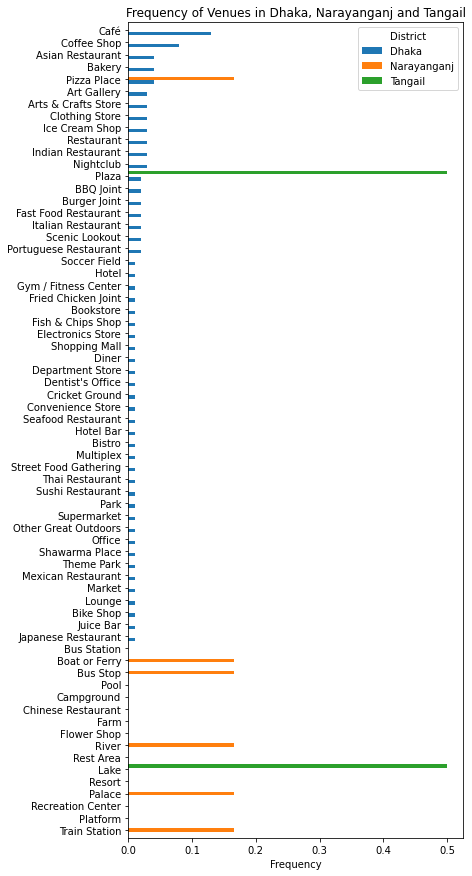

In [94]:
dhk_grpd.plot(kind='barh', width=0.8, figsize=(6, 15))

plt.xlabel('Frequency') # add to x-label to the plot
plt.title('Frequency of Venues in Dhaka, Narayanganj and Tangail') # add title to the plot

plt.show()

#### Frequency of different kinds of restaurants in Dhaka only!

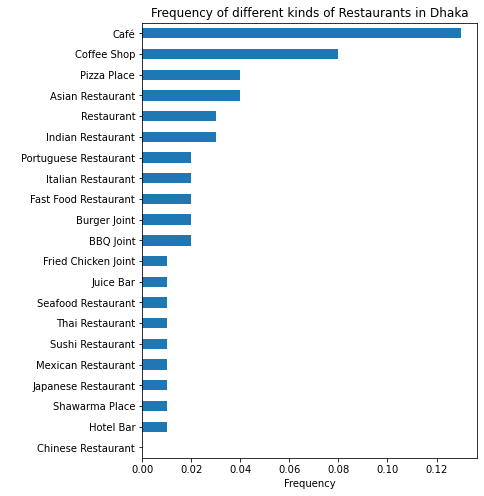

In [95]:
# Little bit data processing here! 

dhk_grpd.drop(['Narayanganj','Tangail'], axis=1, inplace = True)
dhk_grpd.reset_index(inplace = True)

df1 = dhk_grpd[dhk_grpd['index'].isin(["Steakhouse", "Coffee Shop", "Café" ])]

df2 = dhk_grpd[dhk_grpd['index'].str.contains("Restaurant")]
df3 = dhk_grpd[dhk_grpd['index'].str.contains("Joint")]
df4 = dhk_grpd[dhk_grpd['index'].str.contains("Place")]
df5 = dhk_grpd[dhk_grpd['index'].str.contains("Bar")]

dhk_restaurants = pd.concat([df1, df2, df3, df4, df5])
dhk_restaurants.set_index("index", inplace = True)
dhk_restaurants.sort_values(by='Dhaka' , inplace=True)

# Let's plot the restaurant data in the district of Dhaka only--

ax = dhk_restaurants.plot(kind='barh', figsize=(6, 8))

plt.xlabel('Frequency') # add to x-label to the plot
plt.ylabel(' ')
plt.title('Frequency of different kinds of Restaurants in Dhaka') # add title to the plot

ax.get_legend().set_visible(False)
plt.show()

#### Let's pull out the population data!

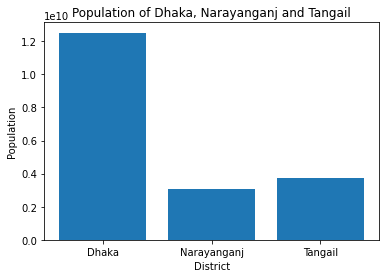

In [96]:
df_population = df_Bangladesh[df_Bangladesh.District.isin(["Dhaka", "Narayanganj", "Tangail" ])]

plt.bar(df_population['District'], df_population['Population'], width=0.8, bottom=None, align='center')
plt.xlabel('District') # add to x-label to the plot
plt.ylabel('Population') # add y-label to the plot
plt.title('Population of Dhaka, Narayanganj and Tangail') # add title to the plot
plt.show()

From the charts above, the population of Dhaka is more than twice than that of Narayanganj and Tangail. At this stage, we want to add one more dataset in this study to get better insight of restaurant business in Dhaka city. Let's do this! 

#### Webscrape the data using BeautifulSoup

In [97]:
# url that we are scraping
url = 'http://en.banglapedia.org/index.php?title=Dhaka_District'

# this is the html from the given url
html = urlopen(url)

soup = BeautifulSoup(html)

# skip the first 1 header rows
data_rows2 = soup.findAll('tr')[5:]  

bangladesh_data2 = [[td.getText() for td in data_rows2[i].findAll('td')]
            for i in range(len(data_rows2))]

In [98]:
# create an empty list to hold all the data
bangladesh_data2_02 = []  

# for each table row
for i in range(len(data_rows2)):
    # create an empty list for each row
    bangladesh_row2 = []  

    # for each table data element from each table row
    for td in data_rows2[i].findAll('td'):        
        # get the text content and append to the player_row 
        bangladesh_row2.append(td.getText())        

    # then append each rows
    bangladesh_data2_02.append(bangladesh_row2)

In [99]:
bangladesh_data2 == bangladesh_data2_02

True

#### Load the data into Pandas dataframe 

In [100]:
df_dhk_demo = pd.DataFrame(bangladesh_data2)
df_dhk_demo = df_dhk_demo[3:]

In [101]:
new_header = df_dhk_demo.iloc[0] #grab the first row for the header
df_dhk_demo = df_dhk_demo[1:] #take the data less the header row
df_dhk_demo.columns = new_header #set the header row as the df header

df_dhk_demo.drop ([None], axis= 1, inplace = True) 

df_dhk_demo.columns = ['Name of Metropolitan Thana', 'Area (sq km)', 'Ward and Union', 'Mahalla and Mouza','Population', 'Density (per sq km)', 'Literacy']
df_dhk_demo.drop (['Ward and Union', 'Mahalla and Mouza'], axis= 1, inplace = True) 

df_dhk_demo = df_dhk_demo[:-7] 

df_dhk_demo['Literacy Rate (%)'] = df_dhk_demo.Literacy.str[:6]
df_dhk_demo.drop (['Literacy'], axis= 1, inplace = True) 

df_dhk_demo[["Area (sq km)", "Population", "Density (per sq km)","Literacy Rate (%)"]] = df_dhk_demo[["Area (sq km)", "Population", "Density (per sq km)","Literacy Rate (%)"]].astype(float)


In [102]:
df_dhk_demo.reset_index(drop = True)

,Name of Metropolitan Thana,Area (sq km),Population,Density (per sq km),Literacy Rate (%)
0,Adabor,2.07,86540.0,41806.00,62.24
1,Uttar Khan,20.09,52014.0,2590.00,64.58
2,Uttara,36.91,66636.0,11295.00,65.67
3,Kadamtali,10.16,330565.0,32536.00,63.87
4,Kalabagan,1.26,106671.0,84660.00,76.88
5,Kafrul,7.89,272939.0,34593.00,69.87
6,Kamrangirchar,3.63,143208.0,39452.00,42.84
7,Cantonment,14.47,117464.0,11393.00,70.30
8,Kotwali,0.67,82488.0,123117.00,77.78
9,Khilkhet,15.88,39227.0,2470.00,58.32


In [103]:
df_dhk_demo.dtypes

Name of Metropolitan Thana     object
Area (sq km)                  float64
Population                    float64
Density (per sq km)           float64
Literacy Rate (%)             float64
dtype: object

### Exploratory Data Analysis

#### Population: Areas with more than average population in Dhaka

In [104]:
mean_pop_dhk = df_dhk_demo['Population'].mean() 
dhk_pop = df_dhk_demo[df_dhk_demo['Population'] >= (mean_pop_dhk)]
dhk_pop.head()

,Name of Metropolitan Thana,Area (sq km),Population,Density (per sq km),Literacy Rate (%)
7,Kadamtali,10.16,330565.0,32536.0,63.87
9,Kafrul,7.89,272939.0,34593.0,69.87
14,Khilgaon,14.83,230902.0,15560.0,56.92
16,Gendaria,1.83,160541.0,87728.0,69.97
17,Chawkbazar Model,2.07,160112.0,77349.0,75.49


In [105]:
df_dhk_po = dhk_pop[['Name of Metropolitan Thana', 'Population']]
df_dhk_po.set_index('Name of Metropolitan Thana', inplace = True)
df_dhk_pop = df_dhk_po.sort_values('Population', ascending = False)

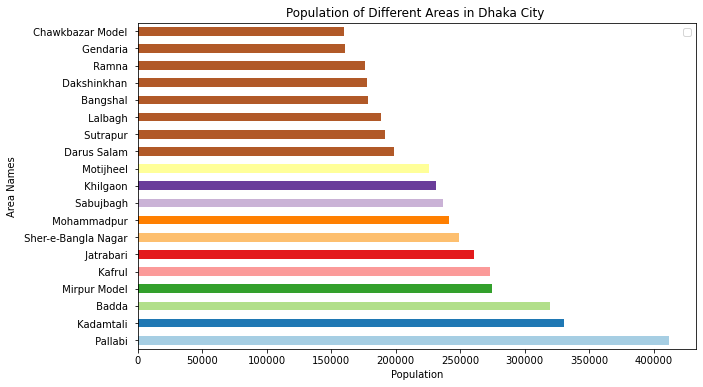

In [106]:
df_dhk_pop.plot(kind='barh', figsize=(10, 6), color=[plt.cm.Paired(np.arange(len(df_dhk_pop)))])

plt.xlabel('Population') # add to x-label to the plot
plt.ylabel('Area Names') # add y-label to the plot
plt.title('Population of Different Areas in Dhaka City ') # add title to the plot

plt.legend('')
plt.show()

#### Population Density: Areas with more than average population density in Dhaka

In [107]:
mean_popdense_dhk = df_dhk_demo['Density (per sq km)'].mean() 
dhk_pop_dense = df_dhk_demo[df_dhk_demo['Density (per sq km)'] >= (mean_popdense_dhk)]
dhk_pop_dense.head()

,Name of Metropolitan Thana,Area (sq km),Population,Density (per sq km),Literacy Rate (%)
4,Adabor,2.07,86540.0,41806.0,62.24
8,Kalabagan,1.26,106671.0,84660.0,76.88
10,Kamrangirchar,3.63,143208.0,39452.0,42.84
12,Kotwali,0.67,82488.0,123117.0,77.78
16,Gendaria,1.83,160541.0,87728.0,69.97


In [108]:
df_dhk_pop_den = dhk_pop_dense[['Name of Metropolitan Thana', 'Density (per sq km)']]
df_dhk_pop_den.set_index('Name of Metropolitan Thana', inplace = True)
df_dhk_pop_dense = df_dhk_pop_den.sort_values('Density (per sq km)', ascending = False)

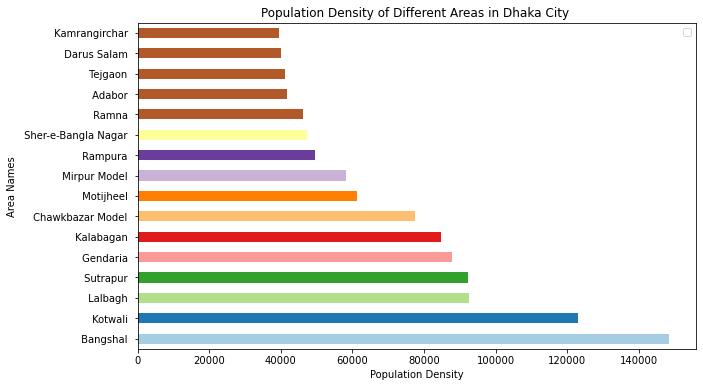

In [109]:
df_dhk_pop_dense.plot(kind='barh', figsize=(10, 6), color=[plt.cm.Paired(np.arange(len(df_dhk_pop_dense)))])

plt.xlabel('Population Density') # add to x-label to the plot
plt.ylabel('Area Names') # add y-label to the plot
plt.title('Population Density of Different Areas in Dhaka City ') # add title to the plot

plt.legend('')
plt.show()

#### Relationship Between Literacy Rate and Population Distribution In Different Parts of Dhaka

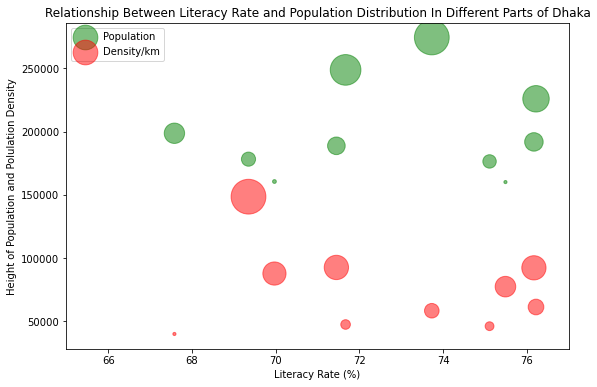

In [110]:
dhk_population = dhk_pop[dhk_pop['Density (per sq km)'] >= (mean_popdense_dhk)]
dhk_population.set_index('Name of Metropolitan Thana', drop = True)

dhk_population['Literacy Rate (%)'].astype(int)
dhk_population = dhk_population.sort_values('Literacy Rate (%)', ascending = False)

# normalize Population data
norm_Population = (dhk_population['Population'] - dhk_population['Population'].min()) / (dhk_population['Population'].max() - dhk_population['Population'].min())

# normalize Population Density data
norm_PopulationDensity = (dhk_population['Density (per sq km)'] - dhk_population['Density (per sq km)'].min()) / (dhk_population['Density (per sq km)'].max() - dhk_population['Density (per sq km)'].min())

# Population
ax0 = dhk_population.plot(kind='scatter',
                    x='Literacy Rate (%)',
                    y='Population',
                    figsize=(9, 6),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_Population * 1200 + 10,  # pass in weights 
                    xlim=(65, 77)
                   )

# Argentina
ax1 = dhk_population.plot(kind='scatter',
                    x='Literacy Rate (%)',
                    y='Density (per sq km)',
                    alpha=0.5,
                    color="red",
                    s=norm_PopulationDensity * 1200 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Height of Population and Polulation Density')
ax0.set_title('Relationship Between Literacy Rate and Population Distribution In Different Parts of Dhaka')
ax0.legend(['Population', 'Density/km'], loc='upper left', fontsize='medium')

In [111]:
dhk_population.dtypes

Name of Metropolitan Thana     object
Area (sq km)                  float64
Population                    float64
Density (per sq km)           float64
Literacy Rate (%)             float64
dtype: object

Looks good so far!

#### Literacy Rate: Areas with top 20% Literacy in Dhaka

In [112]:
sortedliteracy = df_dhk_demo.sort_values('Literacy Rate (%)', ascending = False)
dhk_lit_rate = sortedliteracy[:8]
dhk_lit_area = dhk_lit_rate[['Name of Metropolitan Thana', 'Literacy Rate (%)']]
dhk_lit_area = dhk_lit_area.set_index('Name of Metropolitan Thana', drop = True)
dhk_lit_area

,Literacy Rate (%)
Name of Metropolitan Thana,
New Market,82.32
Paltan,81.74
Shahbagh,79.39
Bimanbandar,79.13
Kotwali,77.78
Kalabagan,76.88
Tejgaon,76.51
Motijheel,76.22


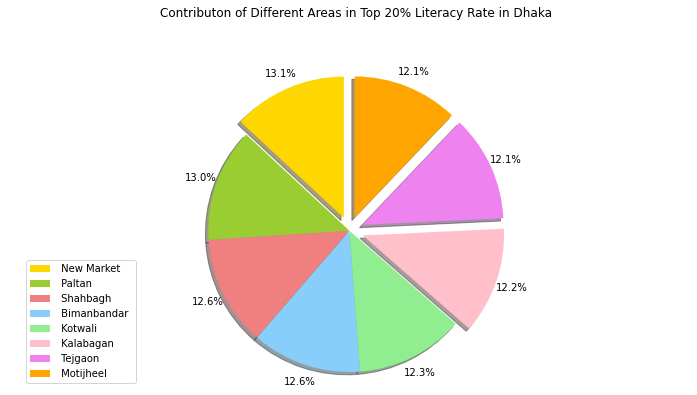

In [113]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'violet', 'orange']
explode_list = [0.1, 0, 0, 0, 0.0, 0.1, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

dhk_lit_area['Literacy Rate (%)'].plot(kind='pie',
                            figsize=(12, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Contributon of Different Areas in Top 20% Literacy Rate in Dhaka', y=1.12) 

plt.axis('equal') 
plt.ylabel(' ') # add y-label to the plot
# add legend
plt.legend(labels=dhk_lit_area.index, loc='lower left') 

plt.show()

### What's that one area with high population density and high literacy rate? Let's find out! 

#### Top 20% Educated Areas in Dhaka

In [114]:
dhk_lit_rate.reset_index(drop =True)

,Name of Metropolitan Thana,Area (sq km),Population,Density (per sq km),Literacy Rate (%)
0,New Market,1.67,66439.0,37173.0,82.32
1,Paltan,1.42,64492.0,34854.0,81.74
2,Shahbagh,3.49,74113.0,21236.0,79.39
3,Bimanbandar,8.02,5079.0,634.0,79.13
4,Kotwali,0.67,82488.0,123117.0,77.78
5,Kalabagan,1.26,106671.0,84660.0,76.88
6,Tejgaon,2.74,118540.0,41073.0,76.51
7,Motijheel,3.69,225999.0,61246.0,76.22


#### Top 20% Educated Areas that has more than average population density per kilometer

In [115]:
area_hi_pop = dhk_lit_rate[dhk_lit_rate['Density (per sq km)']>= (mean_popdense_dhk)]
area_hi_pop.reset_index(drop =True)

,Name of Metropolitan Thana,Area (sq km),Population,Density (per sq km),Literacy Rate (%)
0,Kotwali,0.67,82488.0,123117.0,77.78
1,Kalabagan,1.26,106671.0,84660.0,76.88
2,Tejgaon,2.74,118540.0,41073.0,76.51
3,Motijheel,3.69,225999.0,61246.0,76.22


#### Educated Area that has more than average population and more than average population density per kilometer

In [116]:
area_selected = area_hi_pop[area_hi_pop['Population'] >= (mean_pop_dhk)]
area_selected.reset_index(drop = True)

,Name of Metropolitan Thana,Area (sq km),Population,Density (per sq km),Literacy Rate (%)
0,Motijheel,3.69,225999.0,61246.0,76.22


## Motijheel it is! Aha!

#### Let's see where Motijheel in Dhaka City!

#### Use geopy library to get the latitude and longitude values of "Motijheel, Dhaka"

In [117]:
from geopy.geocoders import Nominatim

address = 'Motijheel'

geolocator = Nominatim(user_agent="Bangladesh_explorer")
location = geolocator.geocode(address)
latitude_Motijheel = location.latitude
longitude_Motijheel = location.longitude
print('The geograpical coordinate of Bangladesh are {}, {}.'.format(latitude_Motijheel, longitude_Motijheel))

The geograpical coordinate of Bangladesh are 23.7265973, 90.4216076.


In [118]:
mot_map = folium.Map(location=[latitude_Motijheel, longitude_Motijheel], zoom_start=12, tiles='Stamen Terrain')

# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
incidents.add_child(folium.features.CircleMarker(
            [latitude_Motijheel, longitude_Motijheel],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
folium.Marker([latitude_Motijheel, longitude_Motijheel]).add_to(mot_map)    
    
# add incidents to map
mot_map.add_child(incidents)

#### What are the venues in Motijheel?

In [119]:
# type your answer here

LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 5000 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_Motijheel, 
    longitude_Motijheel, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=0OIOAMV3MQX4QYSSVYLHCR0MEFPKQTZQ4SS0MH2VZNGJMPWG&client_secret=AQVTXDL3BAYH3ZFXZ1GOYD5CSKIP24J5NRPRC31UUK4Z0TEO&v=20180605&ll=23.7265973,90.4216076&radius=5000&limit=100'

In [120]:
results = requests.get(url).json()

In [121]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [122]:
venues = results['response']['groups'][0]['items']
    
motijheel_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
motijheel_venues =motijheel_venues.loc[:, filtered_columns]

# filter the category for each row
motijheel_venues['venue.categories'] = motijheel_venues.apply(get_category_type, axis=1)

# clean columns
motijheel_venues.columns = [col.split(".")[-1] for col in motijheel_venues.columns]

motijheel_venues.rename(columns={'name': 'Venue Name', 'categories': 'Venue_Category', 'lat': 'Latitude', 'lng': 'Longitude'}, inplace=True)
motijheel_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,Venue Name,Venue_Category,Latitude,Longitude
0,Star Kabab & Restaurant,Restaurant,23.721080,90.414140
1,Sung Food Garden,Indian Restaurant,23.734023,90.410031
2,Hirajheel Hotel & Restaurent,Restaurant,23.724898,90.421565
3,Dhaka Club,Nightclub,23.738875,90.397341
4,Bangabandhu National Stadium,Soccer Field,23.727523,90.413565


In [123]:
print('There are {} uniques categories.'.format(len(motijheel_venues['Venue_Category'].unique())))

There are 27 uniques categories.


#### Who are the competitors?

In [124]:
df1 = motijheel_venues[motijheel_venues['Venue_Category'].isin(["Steakhouse", "Coffee Shop", "Café", "Bakery", "Diner" ])]

df2 = motijheel_venues[motijheel_venues['Venue_Category'].str.contains("Restaurant")]
df3 = motijheel_venues[motijheel_venues['Venue_Category'].str.contains("Joint")]
df4 = motijheel_venues[motijheel_venues['Venue_Category'].str.contains("Place")]

motijheel_restaurants = pd.concat([df1, df2, df3, df4])
motijheel_restaurants.reset_index(drop = True)

,Venue Name,Venue_Category,Latitude,Longitude
0,Hajir Biriani,Diner,23.721663,90.405687
1,Star Kabab & Reataurant,Bakery,23.737621,90.386968
2,Apon Coffee House,Coffee Shop,23.752260,90.421118
3,Barista Lavazza,Café,23.750008,90.393794
4,Sausly's Pantho Path,Bakery,23.752757,90.382310
5,Cafe SoI 3,Café,23.739940,90.378937
6,Star Kabab & Restaurant,Restaurant,23.721080,90.414140
7,Sung Food Garden,Indian Restaurant,23.734023,90.410031
8,Hirajheel Hotel & Restaurent,Restaurant,23.724898,90.421565
9,Hotel Al Razzak,Indian Restaurant,23.718340,90.408796


In [125]:
motijheel = motijheel_restaurants['Venue_Category'].value_counts().to_frame()
motijheel.rename(columns={'Venue_Category': 'Value Counts'}, inplace=True)

#motijheel.reset_index(inplace = True)
motijheel

,Value Counts
Restaurant,5
Asian Restaurant,2
Café,2
Bakery,2
Indian Restaurant,2
Diner,1
Shawarma Place,1
Coffee Shop,1
Pizza Place,1
BBQ Joint,1


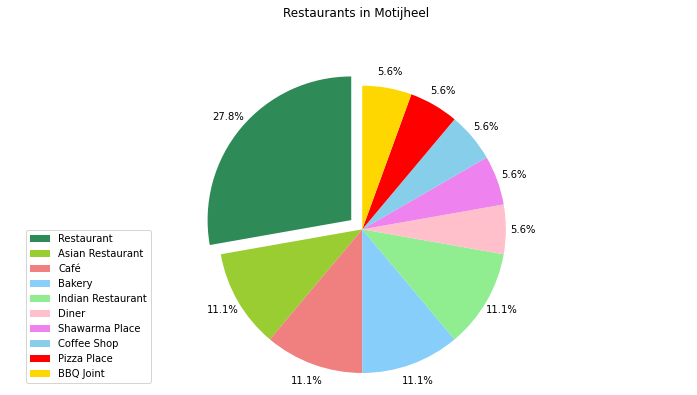

In [126]:
colors_list = ['seagreen', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'violet', 'skyblue', 'red', 'gold']
explode_list = [0.1, 0, 0, 0, 0.0, 0, 0, 0, 0, 0.0] # ratio for each continent with which to offset each wedge.

motijheel['Value Counts'].plot(kind='pie',
                            figsize=(12, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            #shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Restaurants in Motijheel', y=1.12) 

plt.axis('equal') 
plt.ylabel(' ') # add y-label to the plot
# add legend
plt.legend(labels=motijheel.index, loc='lower left') 

plt.show()

#### There's only one Diner in the vicinity!

In [129]:
Diner_data = motijheel_venues[motijheel_venues['Venue_Category'].isin(["Diner"])]
Diner_lat = Diner_data.Latitude
Diner_lng = Diner_data.Longitude

In [130]:
address = 'Dhaka'

geolocator = Nominatim(user_agent="Bangladesh_explorer")
location = geolocator.geocode(address)
latitude_dhk = location.latitude
longitude_dhk = location.longitude
print('The geograpical coordinate of Bangladesh are {}, {}.'.format(latitude_dhk, longitude_dhk))

The geograpical coordinate of Bangladesh are 23.810651, 90.4126466.


#### Let's see where all the restaurants are situated in Motijheel!

In [131]:
mot_map = folium.Map(location=[latitude_Motijheel, longitude_Motijheel], zoom_start=12,  tiles='Stamen Terrain')

# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(motijheel_restaurants.Latitude, motijheel_restaurants.Longitude):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(motijheel_restaurants.Latitude)
longitudes = list(motijheel_restaurants.Longitude)
labels = list(motijheel_restaurants.Venue_Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(mot_map)    
    
# add incidents to map
mot_map.add_child(incidents)

#### Now let's look at the location of the only Diner in Motijheel!

In [132]:
mot_map = folium.Map(location=[latitude_Motijheel, longitude_Motijheel], zoom_start=12,  tiles='Stamen Terrain')

# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(Diner_data.Latitude, Diner_data.Longitude):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(Diner_data.Latitude)
longitudes = list(Diner_data.Longitude)
labels = list(Diner_data.Venue_Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(mot_map)    
    
# add incidents to map
mot_map.add_child(incidents)

## 8. Conclusion

From the above analysis, one will face less competition in the business if a snack place or coffee shop or Asian restaurant or fried chicken joint or a diner is set up in Motijheel area. People loves Biriyani and other spicy heavy meals during lunch and diner. So, we can suggest the investors to open a diner in Motijheel, Dhaka.

Also, the above map shows the location of the only Diner near Motijheel which is quite far from Ramna Park or Sohrawardi Udyan. So, our suggestion would be to set up a diner/ biriyani spot near "Ramna Park" in Motijheel, Dhaka. 

Here ends our analysis. Hope this helps!